In [1]:
# Simulation of (leaky) integrate-and-fire neutron
import numpy as np
import matplotlib.pyplot as plt

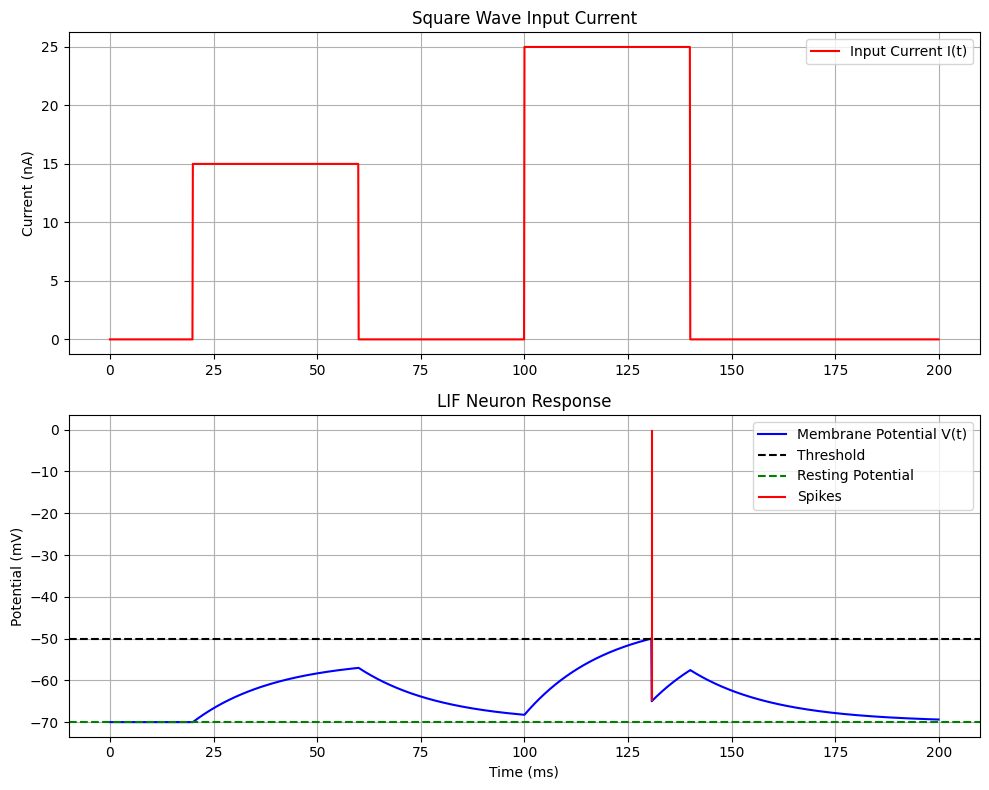

In [2]:
# --- 1. Thiết lập tham số (LIF Parameters) ---
# Dựa trên lý thuyết ta đã học: Tau * dV/dt = -(V - EL) + R*I
tau_m = 20.0    # Thời hằng màng (ms) - "Trí nhớ" của nơ-ron
R_m   = 1.0     # Điện trở màng (MOhms) - Để đơn giản hóa tính toán
E_L   = -70.0   # Điện thế nghỉ (mV)
V_th  = -50.0   # Ngưỡng phát xung (mV)
V_res = -65.0   # Điện thế Reset sau khi bắn (mV)
dt    = 0.1     # Bước thời gian (ms)
T     = 200.0   # Tổng thời gian mô phỏng (ms)

# --- 2. Tạo dòng điện đầu vào hình Sóng Vuông (Square Wave Input) ---
t = np.arange(0, T, dt)
I_input = np.zeros(len(t))

# Logic tạo sóng vuông:
# Chu kỳ 1: Từ 20ms đến 60ms (Bật dòng điện)
# Chu kỳ 2: Từ 100ms đến 140ms (Bật dòng điện mạnh hơn để test phát xung)
for i in range(len(t)):
    if 20 <= t[i] < 60:
        I_input[i] = 15.0  # Dòng điện mức 15 nA (Thử nghiệm dưới ngưỡng)
    elif 100 <= t[i] < 140:
        I_input[i] = 25.0  # Dòng điện mức 25 nA (Thử nghiệm trên ngưỡng)
    else:
        I_input[i] = 0.0   # Tắt dòng điện

# --- 3. Vòng lặp mô phỏng (Simulation Loop) ---
V = np.zeros(len(t))
V[0] = E_L  # Bắt đầu tại trạng thái nghỉ
spikes = [] # Lưu thời điểm bắn xung

for i in range(1, len(t)):
    # Phương trình vi phân (Euler method):
    # dV = dt/tau * ( -(V_old - E_L) + R*I )
    dV = (dt / tau_m) * (-(V[i-1] - E_L) + R_m * I_input[i-1])
    
    # Cập nhật điện thế
    V[i] = V[i-1] + dV
    
    # Kiểm tra ngưỡng (Threshold Check)
    if V[i] >= V_th:
        V[i] = V_res     # Reset điện thế
        spikes.append(t[i]) # Ghi nhận thời điểm bắn

# --- 4. Vẽ đồ thị (Plotting) ---
plt.figure(figsize=(10, 8))

# Đồ thị 1: Dòng điện đầu vào (Square Wave)
plt.subplot(2, 1, 1)
plt.plot(t, I_input, 'r', label='Input Current I(t)')
plt.title('Square Wave Input Current')
plt.ylabel('Current (nA)')
plt.grid(True)
plt.legend()

# Đồ thị 2: Điện thế màng (Membrane Potential)
plt.subplot(2, 1, 2)
plt.plot(t, V, 'b', label='Membrane Potential V(t)')
plt.axhline(y=V_th, color='k', linestyle='--', label='Threshold')
plt.axhline(y=E_L, color='g', linestyle='--', label='Resting Potential')

# Vẽ các điểm bắn xung (nếu có)
if len(spikes) > 0:
    plt.vlines(spikes, ymin=V_res, ymax=0, colors='r', linestyles='-', label='Spikes')

plt.title('LIF Neuron Response')
plt.xlabel('Time (ms)')
plt.ylabel('Potential (mV)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()